## Import

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## 1. Simple Linear Regression (Univariable)

$$H(x)=wx+b$$

|$x$|$y$|
|---|---|
|1|2|
|2|4|
|3|6|

학습을 하고 난 뒤에 나와야 하는 식은 다음과 같다.

$$H(x) = 2x$$

In [4]:
torch.manual_seed(1)

In [5]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [6]:
print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [7]:
print(y_train)
print(y_train.shape)

tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


weight와 bias 초기화 하기

In [8]:
# Weight and bias Initialization
W = torch.zeros(1, requires_grad=True)
print(W)

tensor([0.], requires_grad=True)


In [9]:
b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


가설 설정

In [10]:
# Hypothesis
h = x_train * W + b
print(h)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


In [11]:
cost = torch.mean((h - y_train) ** 2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


옵티마이저 설정

In [12]:
# SGD
optimizer = optim.SGD([W, b], lr=0.01)

In [13]:
# gradient zero
optimizer.zero_grad()
# 미분하여 gradient 구하기
cost.backward()
# W와 b를 업데이트
optimizer.step()

학습하기

In [14]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 2000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/2000 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/2000 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/2000 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/2000 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/2000 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/2000 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/2000 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/2000 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/2000 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/2000 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/2000 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/2000 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/2000 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/2000 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/2000 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/2000 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/2000 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/2000 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/2000 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/2000 W: 1.997, b: 0.008 Cost: 0.000008

### Autograd

In [15]:
# Autograd
w = torch.tensor(3.0, requires_grad=True)

In [16]:
# w를 이용해서 hypothesis 생성
y = w ** 2
z = 2 * y + 5

In [17]:
# Backpropagation을 통해서 Gradient 값 만들기
z.backward()

In [18]:
# Gradient 값 확인
w.grad

tensor(12.)

## 2. Multivariable Linear Regression (Multivariable)

$$H(\mathbf{x})=w_1x_1 + w_2x_2 + w_3x_3 + b$$

|$x_1$|$x_2$|$x_3$|$y$|
|---|---|---|---|
|73|80|75|152|
|93|88|93|185|
|89|91|90|180|
|96|98|100|196|
|73|66|70|142|

위의 데이터 관계를 나타낼수 있는 Linear Model을 학습

In [ ]:
# Data 생성
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [ ]:
# 데이터 shape 확인
print(x1_train.shape)
print(y_train.shape)

torch.Size([5, 1])
torch.Size([5, 1])


In [ ]:
# 가중치 w와 편향 b 초기화
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [ ]:
# weight and bias shape 확인
print(w1.shape)
print(b.shape)

torch.Size([1])
torch.Size([1])


In [ ]:
# optimizer 설정
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산, broadcasting
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선 (Weight와 Bias Update)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
        ))

Epoch    0/1000 w1: 0.294 w2: 0.294 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.661 w3: 0.676 b: 0.008 Cost: 1.563628
Epoch  200/1000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 Cost: 1.497595
Epoch  300/1000 w1: 0.684 w2: 0.649 w3: 0.677 b: 0.008 Cost: 1.435044
Epoch  400/1000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 Cost: 1.375726
Epoch  500/1000 w1: 0.694 w2: 0.638 w3: 0.678 b: 0.009 Cost: 1.319507
Epoch  600/1000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 Cost: 1.266222
Epoch  700/1000 w1: 0.704 w2: 0.627 w3: 0.679 b: 0.009 Cost: 1.215703
Epoch  800/1000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 Cost: 1.167810
Epoch  900/1000 w1: 0.713 w2: 0.617 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch 1000/1000 w1: 0.718 w2: 0.613 w3: 0.680 b: 0.009 Cost: 1.079390


## 3. Linear Regression with nn.Module

### 3.1 Simple Linear Regression

In [ ]:
# 데이터 생성
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [ ]:
# 모델을 선언 및 초기화. 단순 선형 회귀이므로 input_dim=1, output_dim=1.
model = nn.Linear(1,1)

In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [ ]:
# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
# 전체 훈련 데이터에 대해 SGD을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[1.9994]], requires_grad=True),
 Parameter containing:
 tensor([0.0014], requires_grad=True)]

### 3.2 Multivariable Linear Regression

In [ ]:
torch.manual_seed(1)

In [ ]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [ ]:
# 모델을 선언 및 초기화. 다중 선형 회귀이므로 input_dim=3, output_dim=1.
model = nn.Linear(3,1)

In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [ ]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 31667.599609
Epoch  100/2000 Cost: 0.225988
Epoch  200/2000 Cost: 0.223909
Epoch  300/2000 Cost: 0.221935
Epoch  400/2000 Cost: 0.220059
Epoch  500/2000 Cost: 0.218270
Epoch  600/2000 Cost: 0.216571
Epoch  700/2000 Cost: 0.214954
Epoch  800/2000 Cost: 0.213418
Epoch  900/2000 Cost: 0.211954
Epoch 1000/2000 Cost: 0.210558
Epoch 1100/2000 Cost: 0.209230
Epoch 1200/2000 Cost: 0.207967
Epoch 1300/2000 Cost: 0.206767
Epoch 1400/2000 Cost: 0.205618
Epoch 1500/2000 Cost: 0.204524
Epoch 1600/2000 Cost: 0.203484
Epoch 1700/2000 Cost: 0.202488
Epoch 1800/2000 Cost: 0.201542
Epoch 1900/2000 Cost: 0.200637
Epoch 2000/2000 Cost: 0.199772


In [ ]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[151.2305]], grad_fn=<AddmmBackward>)


In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.9778, 0.4539, 0.5768]], requires_grad=True), Parameter containing:
tensor([0.2802], requires_grad=True)]


## 4. Implementing Pytorch Model with class

지금까지는 클래스를 사용하지 않고 구현을 하였습니다.

다음은 simple linear regression 모델의 예 이다.

In [ ]:
model = nn.Linear(1, 1)

위에는 nn.Linear(1, 1)이라는 함수만을 이용해서 모델을 구현하였고 같은 일을 하는 클래스를 구현 하면 다음과 같다.

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1) # input_dim=1, output_dim=1
    def forward(self, x):
        return self.linear(x)

In [ ]:
model = LinearRegressionModel()

1. 파이토치 모델을 클래스로 구현 하기 위해서는 클래스가 `nn.Module`을 상속 받아야 한다.
2. 클래스 내부에서 `__init__` 함수와 `forward` 함수를 구현 해야 한다.
3. `__init__`에서는 initialization관련된 부분이다.
4. `forward`는 input이 들어왔을 때 어떤 연산을 할 것인지를 정의 하는 부분이다. `forward`의 output은 hypothesis의 결과
5. 참고로 `forward`함수는 `model(input)`과 같은 형식으로 호출하면 자동으로 `model.forward(input)`이 실행 된다.

multivariable linear regression model의 경우도 똑같이 구현 할 수 있다.

In [ ]:
model = nn.Linear(3, 1)

In [ ]:
class MultivariableLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)
    
    def forward(self, x):
        return self.linear(x)

### 4.1. Simple Linear Regression with class

In [ ]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [ ]:
model = LinearRegressionModel()

In [ ]:
# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

In [ ]:
# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 15.171722
Epoch  100/2000 Cost: 0.006754
Epoch  200/2000 Cost: 0.004174
Epoch  300/2000 Cost: 0.002579
Epoch  400/2000 Cost: 0.001594
Epoch  500/2000 Cost: 0.000985
Epoch  600/2000 Cost: 0.000609
Epoch  700/2000 Cost: 0.000376
Epoch  800/2000 Cost: 0.000232
Epoch  900/2000 Cost: 0.000144
Epoch 1000/2000 Cost: 0.000089
Epoch 1100/2000 Cost: 0.000055
Epoch 1200/2000 Cost: 0.000034
Epoch 1300/2000 Cost: 0.000021
Epoch 1400/2000 Cost: 0.000013
Epoch 1500/2000 Cost: 0.000008
Epoch 1600/2000 Cost: 0.000005
Epoch 1700/2000 Cost: 0.000003
Epoch 1800/2000 Cost: 0.000002
Epoch 1900/2000 Cost: 0.000001
Epoch 2000/2000 Cost: 0.000001


### 4.2 Multivariable Linear Regression with class

In [ ]:
torch.manual_seed(1)
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [ ]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1) # 다중 선형 회귀이므로 input_dim=3, output_dim=1.

    def forward(self, x):
        return self.linear(x)

In [ ]:
model = MultivariateLinearRegressionModel()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [ ]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 31667.599609
Epoch  100/2000 Cost: 0.225988
Epoch  200/2000 Cost: 0.223909
Epoch  300/2000 Cost: 0.221935
Epoch  400/2000 Cost: 0.220059
Epoch  500/2000 Cost: 0.218270
Epoch  600/2000 Cost: 0.216571
Epoch  700/2000 Cost: 0.214954
Epoch  800/2000 Cost: 0.213418
Epoch  900/2000 Cost: 0.211954
Epoch 1000/2000 Cost: 0.210558
Epoch 1100/2000 Cost: 0.209230
Epoch 1200/2000 Cost: 0.207967
Epoch 1300/2000 Cost: 0.206767
Epoch 1400/2000 Cost: 0.205618
Epoch 1500/2000 Cost: 0.204524
Epoch 1600/2000 Cost: 0.203484
Epoch 1700/2000 Cost: 0.202488
Epoch 1800/2000 Cost: 0.201542
Epoch 1900/2000 Cost: 0.200637
Epoch 2000/2000 Cost: 0.199772


## 5. Mini Batch and DataLoader

### 5.1 Mini Batch

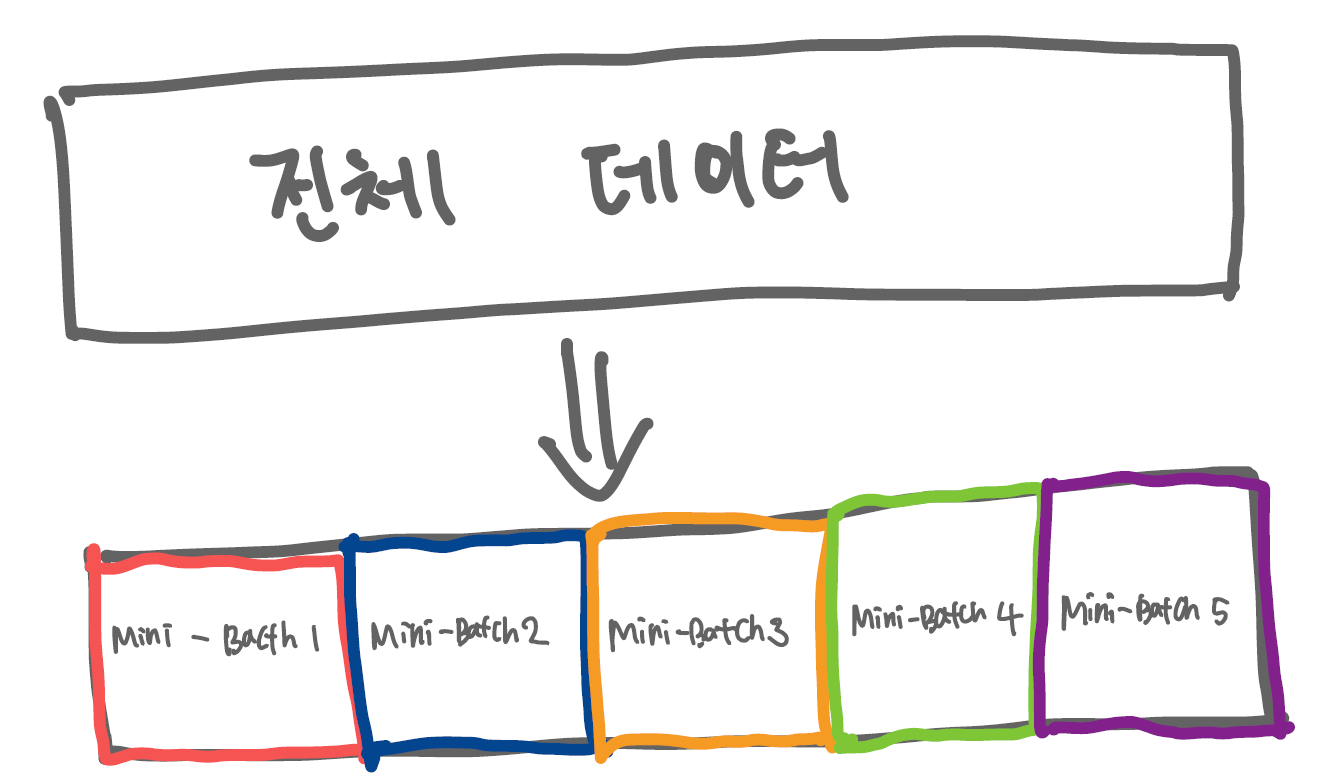

전체데이터를 작은 단위의 mini-batch로 나눠서 이에 대해서 gradient descendent를 수행하고 이를 stochastic gradient descendent (SGD)라고 한다.

SGD를 사용하면 메모리 사용량에 있어서 장점이 있다.

기계학습 모델을 학습 시킬 때 1epoch의 개념이 있는데 이는 전체 데이터를 다 봤을 때 를 1epoch이라고 하고 위의 그림에서 mini-batches 5개를 모두 훈련에 한번씩 사용한 경우 1epoch이라고 할 수 있다.

### 5.2 Iteration

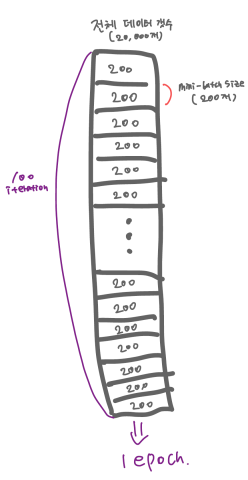

위의 예제에서 1epoch을 돌 동안 모델의 parameters (weights)은 100번 update 된다.

### 5.3 DataLoader

In [ ]:
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

In [ ]:
dataset = TensorDataset(x_train, y_train)

In [ ]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [ ]:
model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [ ]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        # print(batch_idx)
        # print(samples)
        x_train, y_train = samples
        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 3/3 Cost: 5451.569824
Epoch    1/20 Batch 3/3 Cost: 244.422516
Epoch    2/20 Batch 3/3 Cost: 2.371109
Epoch    3/20 Batch 3/3 Cost: 23.620941
Epoch    4/20 Batch 3/3 Cost: 18.382185
Epoch    5/20 Batch 3/3 Cost: 28.939528
Epoch    6/20 Batch 3/3 Cost: 33.501232
Epoch    7/20 Batch 3/3 Cost: 10.461083
Epoch    8/20 Batch 3/3 Cost: 7.897373
Epoch    9/20 Batch 3/3 Cost: 16.064274
Epoch   10/20 Batch 3/3 Cost: 23.461618
Epoch   11/20 Batch 3/3 Cost: 18.300760
Epoch   12/20 Batch 3/3 Cost: 29.221766
Epoch   13/20 Batch 3/3 Cost: 6.903048
Epoch   14/20 Batch 3/3 Cost: 4.506939
Epoch   15/20 Batch 3/3 Cost: 19.031033
Epoch   16/20 Batch 3/3 Cost: 1.366826
Epoch   17/20 Batch 3/3 Cost: 12.546141
Epoch   18/20 Batch 3/3 Cost: 20.121801
Epoch   19/20 Batch 3/3 Cost: 23.168087
Epoch   20/20 Batch 3/3 Cost: 14.621032


In [ ]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[157.2804]], grad_fn=<AddmmBackward>)


### 5.4 Custom Dataset

#### 5.4.1 Custom Dataset 기본 구조

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self):
        # 데이터 전처리
        raise NotImplementedError
    def __len__(self):
        # 데이터셋의 길이, # of samples
        raise NotImplementedError
    def __getitem__(self, idx):
        # 특정 idx에 대한 return 값을 정의
        raise NotImplementedError 

#### 5.4.2 Custom Dataset으로 Linear Regression 구현하기

In [ ]:
# Dataset 상속
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self):
        self.x_data = [[73, 80, 75],
                          [93, 88, 93],
                          [89, 91, 90],
                          [96, 98, 100],
                          [73, 66, 70]]
        self.y_data = [[152], [185], [180], [196], [142]]
    
        # 총 데이터의 개수를 리턴
    def __len__(self):
        return len(self.x_data)
    # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
    def __getitem__(self, idx): 
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        return x, y

In [ ]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [ ]:
model = torch.nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [ ]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        # print(batch_idx)
        # print(samples)
        x_train, y_train = samples
        # H(x) 계산
        prediction = model(x_train)
        
        # cost 계산
        cost = F.mse_loss(prediction, y_train)
        
        # cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
    
    print(f"Epoch {epoch}/{nb_epochs} Batch {batch_idx + 1}/{len(dataloader)} Cost: {cost.item():.6f}")

Epoch 0/20 Batch 3/3 Cost: 265.587646
Epoch 1/20 Batch 3/3 Cost: 29.130114
Epoch 2/20 Batch 3/3 Cost: 0.347430
Epoch 3/20 Batch 3/3 Cost: 0.133708
Epoch 4/20 Batch 3/3 Cost: 0.872196
Epoch 5/20 Batch 3/3 Cost: 3.675620
Epoch 6/20 Batch 3/3 Cost: 4.115198
Epoch 7/20 Batch 3/3 Cost: 0.541011
Epoch 8/20 Batch 3/3 Cost: 0.475009
Epoch 9/20 Batch 3/3 Cost: 0.379077
Epoch 10/20 Batch 3/3 Cost: 0.169306
Epoch 11/20 Batch 3/3 Cost: 7.203641
Epoch 12/20 Batch 3/3 Cost: 2.151806
Epoch 13/20 Batch 3/3 Cost: 1.542348
Epoch 14/20 Batch 3/3 Cost: 5.621217
Epoch 15/20 Batch 3/3 Cost: 1.598873
Epoch 16/20 Batch 3/3 Cost: 2.924645
Epoch 17/20 Batch 3/3 Cost: 1.334234
Epoch 18/20 Batch 3/3 Cost: 0.686676
Epoch 19/20 Batch 3/3 Cost: 1.107190
Epoch 20/20 Batch 3/3 Cost: 3.013405


In [ ]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[152.1021]], grad_fn=<AddmmBackward>)
